# Machine Learning - Regressão Linear

### Objetivo deste projeto é prever o salário para determinados anos de experiência com base no conjunto de dados fornecido.


#### Importando as bibliotecas necessárias

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

#### Lendo o Dataframe e definindo como Df

In [26]:
df = pd.read_csv('Salary_Data.csv')

#### Vamos verificar o cabeçalho com o método .head() e dar uma olhada nos dados

In [27]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### Verificando as informações do Dataframe

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


#### Verificando se existem valores nulos existentes

In [29]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

#### Visualizando as correlações e Plotando um gráfico de dispersão para visualizar as variáveis Anos de experiência e Salário

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

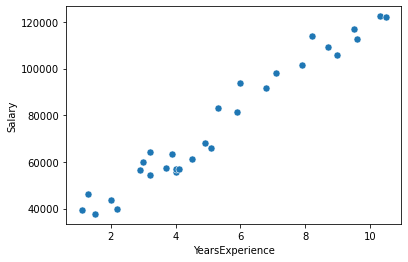

In [30]:
print(df.corr())
sns.scatterplot(x=df['YearsExperience'], y=df['Salary'], s = 50)

#### Visualizando todas as relações

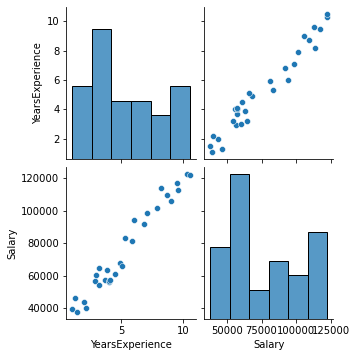

In [31]:
sns.pairplot(df, palette='coolwarm')

#### Visualizando as correlações com um Mapa de Calor

<AxesSubplot:>

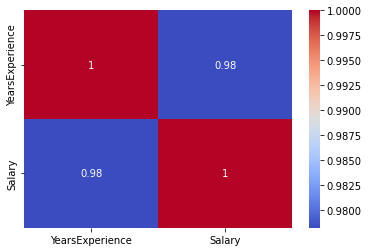

In [32]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

- Percebemos que a  relação do Salário com os Anos de Experiência tem uma correlação muito alta de 98% 
- Na próxima etapa, vamos construir o modelo de regressão linear

### Construindo o Modelo
- O primeiro passo é dividir o conjunto de dados fornecido, em conjunto de dados de treinamento e conjunto de dados de teste. 
- Enquanto o conjunto de dados de treinamento será usado para construir e treinar o modelo, o conjunto de dados de teste será aproveitado para validar o modelo.

#### Dividindo o conjunto de dados
- X vai receber os dados que usaremos para fazer previsões (Anos de experiência)
- y vai receber os dados que estaremos prevendo (Salário)

In [33]:
X = df[['YearsExperience']]
y = df[['Salary']]

#### Importando as bilbiotecas necessárias para treinar e constuir o modelo de Machine learning, e vamos importar também as métricas para validação do Modelo

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

#### Dividindo os dados respectivamente em treino e teste
- X_train e y_train serão usados para treinar o modelo
- X_test e y_test serão usados para testar o modelo com dados novos
- Usaremos 80% dos dados para treino, e usando o método test_size=0.2, usaremos 20% dos dados para teste

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

#### Constuiremos agora o modelo
- Estaremos definindo o método de Regressão Linear como lm
- Usaremos o método de treino .fit() e passaremos dentro os nossos parâmetros de treino

In [36]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

#### Visualizando o coeficiente e o Intercept

In [37]:
m = lm.coef_
print("O Coeficiente é : ", m)

O Coeficiente é :  [[9339.08172382]]


In [38]:
c= lm.intercept_
print("Intercept : ", c)

Intercept :  [25918.43833489]


In [39]:
prediction = lm.predict(X_test)

#### Equação da linha prevista
y = m*x + c

y = 9339.08 * x + 25918.43

#### Predizendo 5 Valores de salário 

In [40]:
lm.predict(X_test)[:5]

array([[115573.62288352],
       [ 71679.93878159],
       [102498.90847018],
       [ 75415.57147111],
       [ 55803.4998511 ]])

#### Visualizando os 10 Valores reais de salário para ver se o Modelo errou

In [41]:
y_test[:5]

,Salary
27,112635.0
15,67938.0
23,113812.0
17,83088.0
8,64445.0


#### Prevendo as respostas (y, o Salário) com base no preditor (X, Anos de experiência)

#### E em seguida estaremos comparando o valor previsto com a resposta real (que foi armazenada em y_test)

Text(0, 0.5, 'Predicted Y')

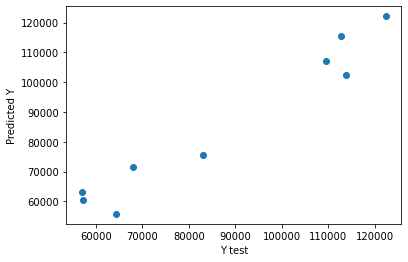

In [42]:
plt.scatter(y_test, prediction)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

### Validando o Modelo 
 - Nesta etapa, verificaremos o desempenho do modelo construído.

#### Existem várias métricas de desempenho e começaremos com o valor de r ao quadrado: 

R-squared  (R ao quadrado ou R2) é uma medida estatística que representa a medida de qualidade de ajuste para modelos de regressão linear. R-squared é a porcentagem da variação da variável dependente que um modelo linear explica.

O R-squared está sempre entre 0 e 1 (0% a 100%)

0 representa um modelo que não explica nenhuma variação da variável resposta em torno de sua média. 1 representa um modelo que explica toda a variação da variável resposta em torno de sua média. Normalmente, quanto maior o R2, melhor o modelo de regressão se ajusta às suas observações.

In [43]:
r2 = r2_score(y_test, prediction)

print("R-squared: ", r2)

R-squared:  0.9414466227178214


In [44]:
lm.score(X_test,y_test)

0.9414466227178214

In [45]:
print('Erro médio absoluto:          ', metrics.mean_absolute_error(y_test, prediction))
print('Erro médio quadrático:        ', metrics.mean_squared_error(y_test, prediction))
print('Raiz do erro médio quadrático:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Erro médio absoluto:           5161.328710400183
Erro médio quadrático:         37784662.46621314
Raiz do erro médio quadrático: 6146.92300799458


#### Predizendo salários com 3,5 anos de Experiência

In [46]:
lm.predict([[3.5]])

array([[58605.22436825]])

#### Equação da linha prevista
y = m*x + c

y = 9339.08 * x + 25918.43

In [48]:
9339.08 *3.5+ 25918.43

58605.21

- Podemos ver que o Modelo errou muito pouco

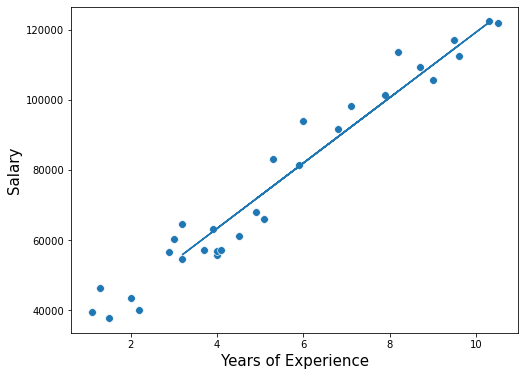

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x="YearsExperience",y="Salary",palette="deep",s=60)
plt.plot(X_test["YearsExperience"],prediction)
plt.xlabel("Years of Experience",size="15")
plt.ylabel("Salary",size="15")
plt.show()

### Conclusão: 
- Estou satisfeito com as previsões do Modelo de Regressão Linear
- O nosso Modelo funciona bem com 94% de precisão.